In [64]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [20]:
dataset = pd.read_csv("../data_processed/webhose_google_news_2019_06_28.csv")

In [43]:
dataset.shape

(8526, 13)

In [71]:
dataset[dataset["level"] > 0].shape

(7079, 13)

In [28]:
def bias_name(label):
    if label == 0:
        return "liberal"
    elif label == 1:
        return "conservative"
    else:
        return "central"

In [29]:
dataset["bias_name"] = dataset["label"].apply(bias_name)

In [67]:
matplotlib.rcParams.update({'font.size': 18})

[Text(0, 0.5, 'Bias'), Text(0.5, 0, 'Percentage')]

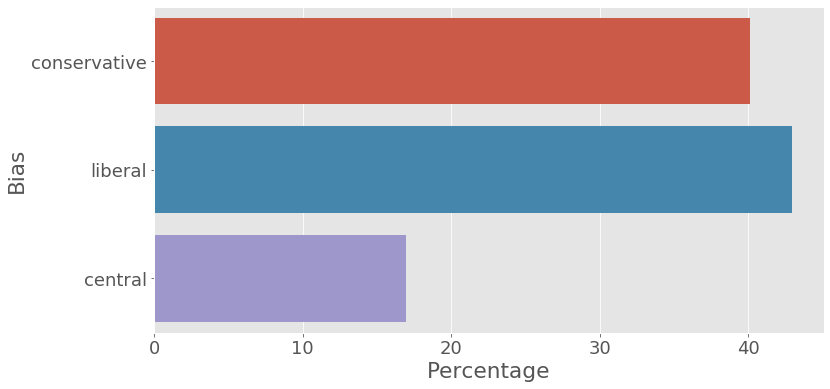

In [68]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dataset, x="label", y="bias_name", estimator=lambda x: len(x)/len(dataset)*100);
ax.set(xlabel="Percentage", ylabel="Bias")

[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Bias Level'),
 Text(0.5, 1.0, 'Bias Level')]

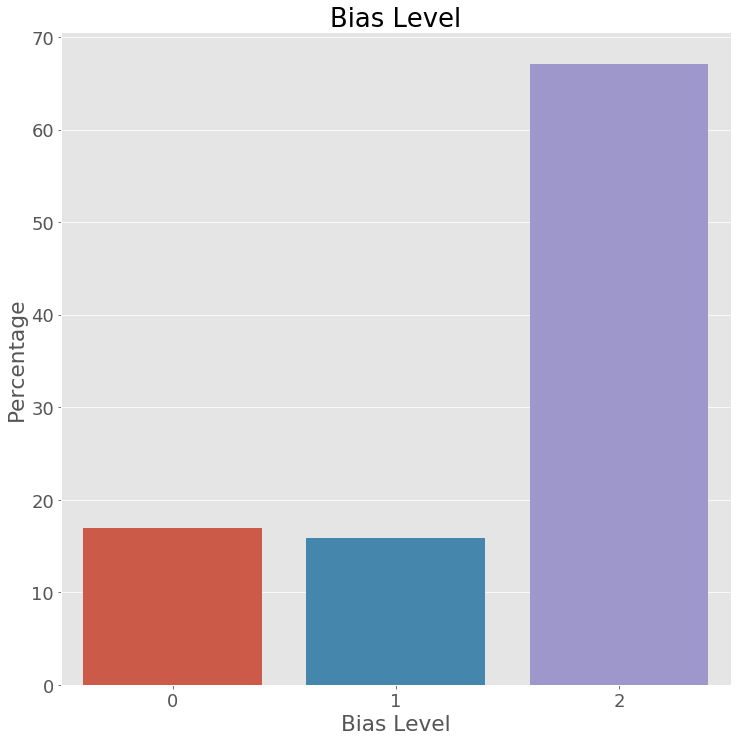

In [69]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(data=dataset, x="level", y="level", estimator=lambda x: len(x)/len(dataset)*100);
ax.set(xlabel="Bias Level", ylabel="Percentage", title="Bias Level")

[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Bias Level'),
 Text(0.5, 1.0, 'Bias Level per side')]

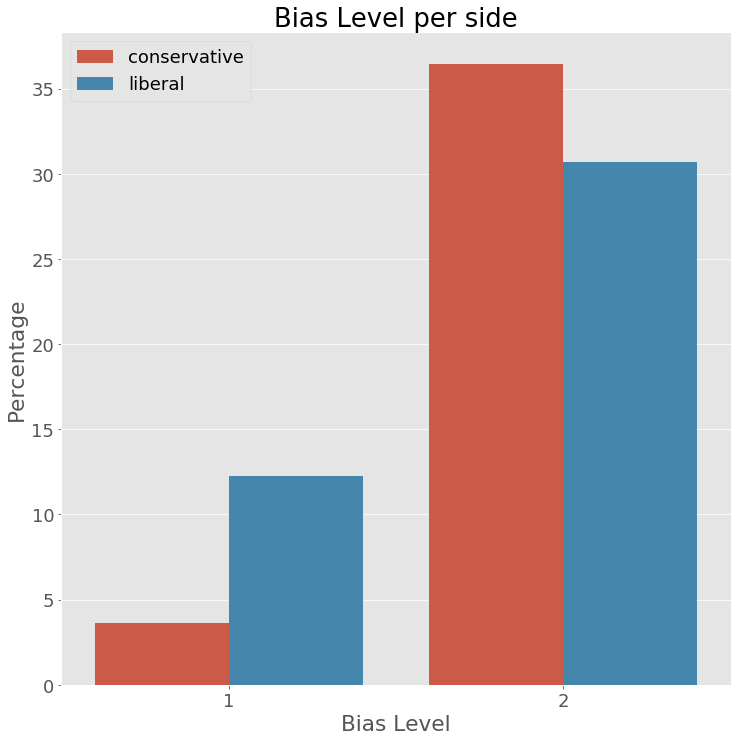

In [70]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(data=dataset[dataset["level"] > 0], x="level", y="level", hue="bias_name", estimator=lambda x: len(x)/len(dataset)*100);
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.set(xlabel="Bias Level", ylabel="Percentage", title="Bias Level per side")